In [1]:
# import matplotlib as plt
import networkx as nx
import numpy as np
import pandas as pd


from networkie.gen import Custom 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


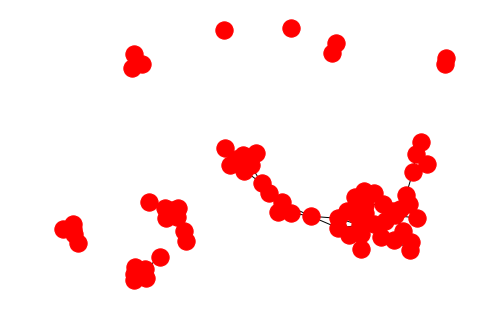

In [2]:
'''answer for 3a'''
Gra =nx.Graph()
Gra = Custom.LoadFromFile().from_in_class_network("dataset/In-class_network.txt")
nx.draw(Gra)

In [3]:
'''answer for 3b'''
gra_number_of_nodes = Gra.order() #number of nodes
gra_size = Gra.size()  #number of edges
gra_average_degree = gra_size*2/gra_number_of_nodes  #degree:一個點連多少邊

'''iv'''
subGRAPHS = list(nx.connected_component_subgraphs(Gra)) #把不同區的graph拆開
avgpathlen_each_subG = []
for subG in subGRAPHS:
    avgpathlen_each_subG.append(nx.average_shortest_path_length(subG)) #算出各subgraph平均的path length

pairs_each_subGs = []
n=0
for subG in subGRAPHS:
    n = len(list(subG)) #各subgraph node 個數
    pairs_each_subGs.append((n*(n-1))/2) #算出各subgraph的連線組合總數 Cn取2

totalpathlen = 0
for i in range(len(avgpathlen_each_subG)):
    totalpathlen += (avgpathlen_each_subG[i])*(pairs_each_subGs[i]) #對各subgraph做出加權的平均path length
    
gra_average_path_length = totalpathlen/sum(pairs_each_subGs)  #把所有subgraph作加權平均

'''v'''
size_of_largest_connected_component = len(subGRAPHS[0]) #把一號找出來算node數

print("(i)  nodes:",gra_number_of_nodes)
print("(ii) edges:",gra_size)
print("(iii)average degree:",gra_average_degree)
print("(iv) average path length:",gra_average_path_length )
print("(v)  nG:",size_of_largest_connected_component)

(i)  nodes: 75
(ii) edges: 109
(iii)average degree: 2.9066666666666667
(iv) average path length: 4.508474576271187
(v)  nG: 45


In [4]:
'''answer for 3c'''

emax=(gra_number_of_nodes*(gra_number_of_nodes-1))/2  #edge數 = 所有點Cn取2
e_emax= gra_size/emax  # edge數 /完全圖edge數

print("emax : ",emax)
print("e/emax : ",e_emax)

emax :  2775.0
e/emax :  0.03927927927927928


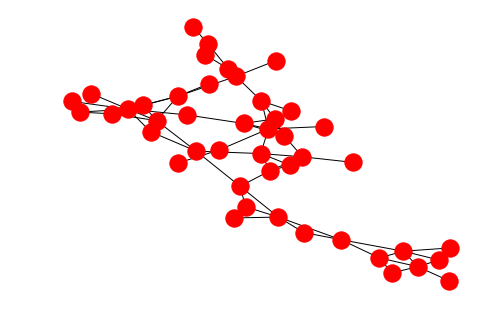

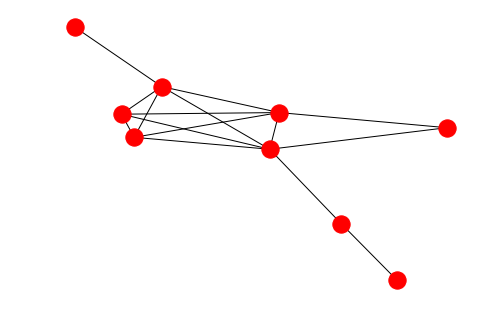

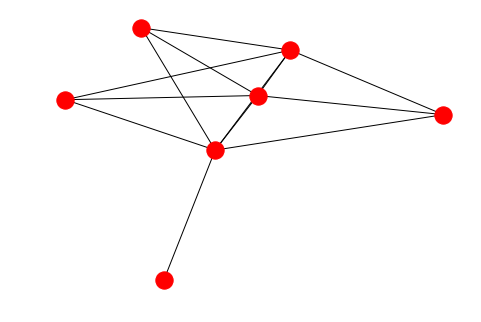

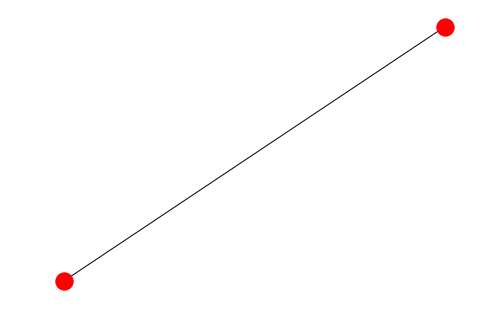

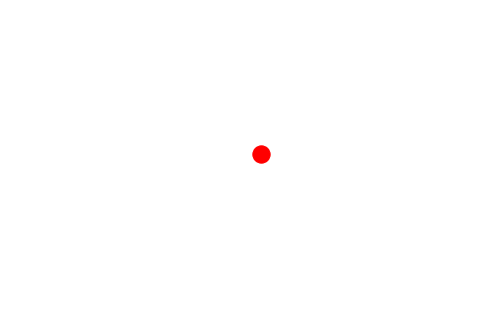

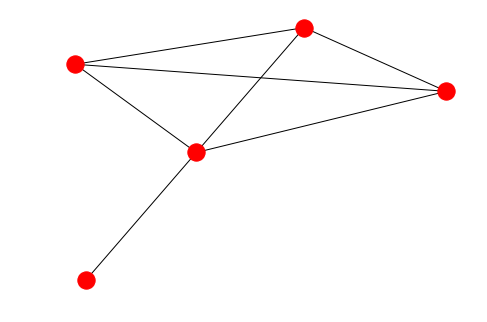

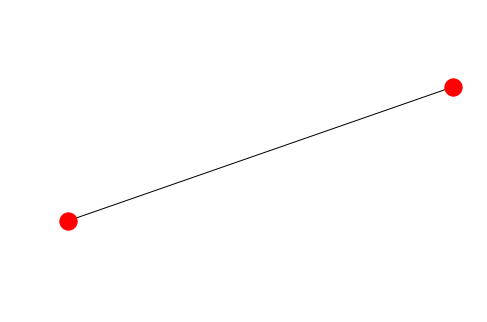

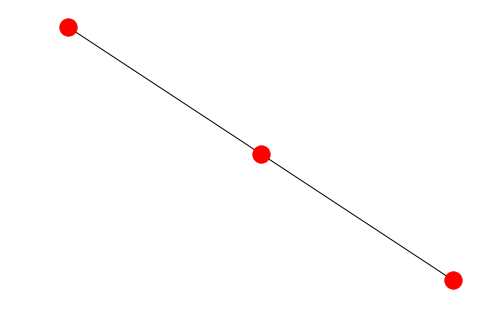

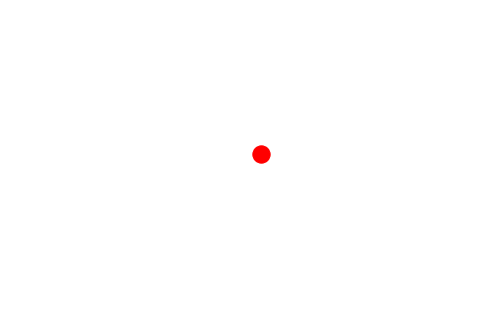

In [5]:
for sub in subGRAPHS:
    nx.draw(sub)
    plt.show()

<Container object of 10 artists>

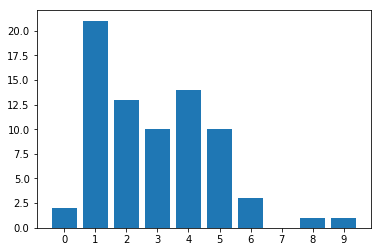

In [6]:
'''answer for 3d'''

from networkie.utils import Measures
degree_to_index_list = Measures.Node().degree_dist(Gra)
degree_to_index_list

distribution = [0]*10
for i in range(len(degree_to_index_list)):
    distribution[degree_to_index_list[i]] += 1
x_axis = [0,1,2,3,4,5,6,7,8,9]
down = [0,1,2,3,4,5,6,7,8,9]
x,d="Degrees","distribution"

plt.bar(x_axis , distribution , tick_label = down)

In [7]:
'''answer for 3e'''
number_of_triangles = Measures.compute_num_triangles(Gra)
print(number_of_triangles)

52
